In [41]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [59]:
df = pd.read_csv('Data/TestData.csv')

In [3]:
# Dime como son los ingresos acumulados a lo largo del tiempo, en este caso ordenados por la variable consecutivoCobro
history = [0]
for i in tqdm(range(len(df))):
    # Haz el valor acumulado de la variable montoCobrado
    # y añade el resultado a la lista history
    chose = random.randint(0, 1)
    history.append(history[-1] - 1.5 * chose - 1.75 * (1 - chose))
# Añade la lista history como una nueva columna al dataframe df


100%|██████████| 2114172/2114172 [00:01<00:00, 1125458.13it/s]


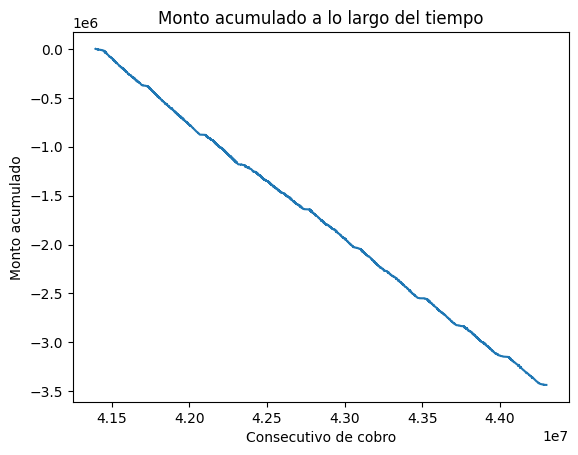

In [4]:
# Visualizar el cada 100 valores
plt.plot(df['consecutivoCobro'][::100], history[::100])
plt.xlabel('Consecutivo de cobro')
plt.ylabel('Monto acumulado')
plt.title('Monto acumulado a lo largo del tiempo')
plt.show()


100%|██████████| 2114172/2114172 [00:06<00:00, 347991.42it/s]


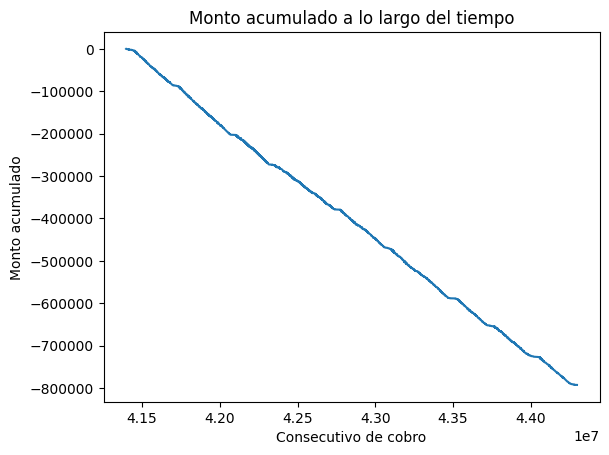

In [5]:
# ahora lo mismo pero la resta 1.5 esta multiplicada por un valor aleatorio entre 0 y 1 y luego por un valor entero entre 0 y 1
history2 = [0]
for i in tqdm(range(len(df))):
    # Haz el valor acumulado de la variable montoCobrado
    # y añade el resultado a la lista history
    history2.append(history2[i] - 1.5 * np.random.rand() * np.random.randint(0, 2))
# Añade la lista history como una nueva columna al dataframe df
# Visualizar el cada 100 valores
plt.plot(df['consecutivoCobro'][::100], history2[::100])
plt.xlabel('Consecutivo de cobro')
plt.ylabel('Monto acumulado')
plt.title('Monto acumulado a lo largo del tiempo')
plt.show()

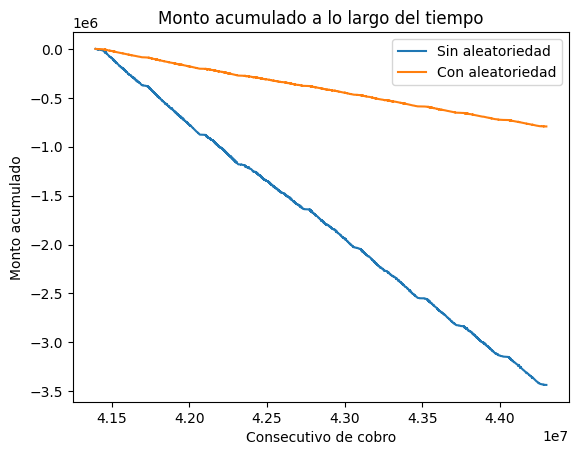

In [6]:
# Comparar los dos graficos
plt.plot(df['consecutivoCobro'][::100], history[::100], label='Sin aleatoriedad')
plt.plot(df['consecutivoCobro'][::100], history2[::100], label='Con aleatoriedad')
plt.xlabel('Consecutivo de cobro')
plt.ylabel('Monto acumulado')
plt.title('Monto acumulado a lo largo del tiempo')
plt.legend()
plt.show()

In [7]:
# Haz que solo sea la historia cada 100
history = history[::100]
history2 = history2[::100]

In [8]:
# Guarda los valores con json para la serie 1 y serie 2
dataframe = pd.DataFrame({'montoAcumulado': history, 'montoAcumulado2': history2})
# Ajustar para que sea {
#   "montoAcumulado": [0, 1, 2, 3],
#   "montoAcumulado2": [0, 1, 2, 3]
#}
# Cambiar el dataframe para que sea un diccionario
dataframe = dataframe.to_dict(orient='records')
import json
with open('Data/series.json', 'w') as f:
    json.dump(dataframe, f)


C:\Users\Felip\AppData\Local\Temp\ipykernel_14408\3389616503.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


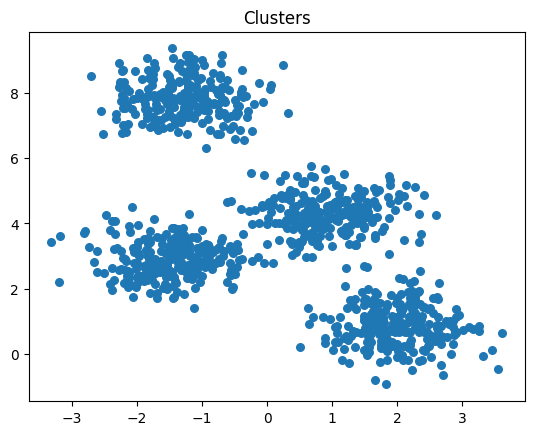

In [37]:
# Ahora haremos un dataset dummy donde generemos 4 clusters, y esos clusters tienen etiquetas
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title('Clusters')
plt.show()


c:\Users\Felip\miniconda3\envs\MLearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


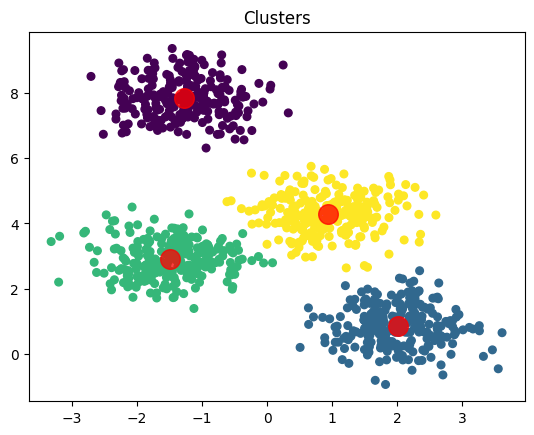

In [38]:
# Aplicamos kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('Clusters')
plt.show()

In [40]:
# Entonces ahora generaremos un cluster con el siguiente formato
"""
{
    "cluster1": {
        "x": [1, 2, 3],
        "y": [4, 5, 6],
        "propor" : [0.1, 0.2, 0.3]
    },
    "cluster2": {
        "x": [7, 8, 9],
        "y": [10, 11, 12],
        "propor" : [0.4, 0.5, 0.6]
    }
}
"""
# PAra cada cluster generamos una distribucion aleatoria entre 4 valores
import random
clusters = {}
for i in range(4):
    clusters[f'cluster{i}'] = {
        'x': X[y_kmeans == i][:, 0].tolist(),
        'y': X[y_kmeans == i][:, 1].tolist(),
        'propor': [random.uniform(0, 1) for _ in range(4)]
    }
# Normalizamos la propor
for i in range(4):
    total = sum(clusters[f'cluster{i}']['propor'])
    clusters[f'cluster{i}']['propor'] = [x / total for x in clusters[f'cluster{i}']['propor']]
# Guardar el diccionario en un json
with open('Data/clusters.json', 'w') as f:
    json.dump(clusters, f)

In [12]:
df = pd.read_csv('Data/ListaCobroDetalle2025.csv')

In [13]:
# Hacemos un historial de cada valor, primero vemos cual es la fecha minima y maxima, fechaCobroBanco
# Pasamos de datatime a timestamp
# convert time to spanish datetime in the format DD/MM/YYYY
df['fechaCobroBanco'] = pd.to_datetime(df['fechaCobroBanco'], format='%d/%m/%Y')
# Convertir a timestamp if the value is not null, if it is null, set it to -1
default =1735776000
df['fechaCobroBanco'] = df['fechaCobroBanco'].apply(lambda x: x.timestamp() if pd.notnull(x) else default)
# Ordenamos por consecutivoCobro
df = df.sort_values(by='consecutivoCobro')

In [22]:
# Now make an array that goes to date min to max
# Get the min and max date
min_date = df['fechaCobroBanco'].min()
print (min_date)
max_date = df['fechaCobroBanco'].max()
print (max_date)
length = int(max_date - min_date) // 60 // 60 // 24
# Create an array of length 1000 with the values from min_date to max_date
dates = np.zeros(length+1)
print (dates.shape)
# Now check for every value in montoCobrado and add it to the array in the position of the date
index = 0

for i in tqdm(range(len(df))):
    # Get the date
    date = df['fechaCobroBanco'][i]
    # Get the index of the date
    if date == default:
        index = index
    else:
        index = int((date - min_date) // 60 // 60 // 24)
    # Visualize in the progress bar the index and the date
    
    # Add the value to the array
    dates[index] += (df['montoCobrado'][i] - 1.75)

1735776000.0
1747872000.0
(141,)


100%|██████████| 2114172/2114172 [00:11<00:00, 181511.10it/s]


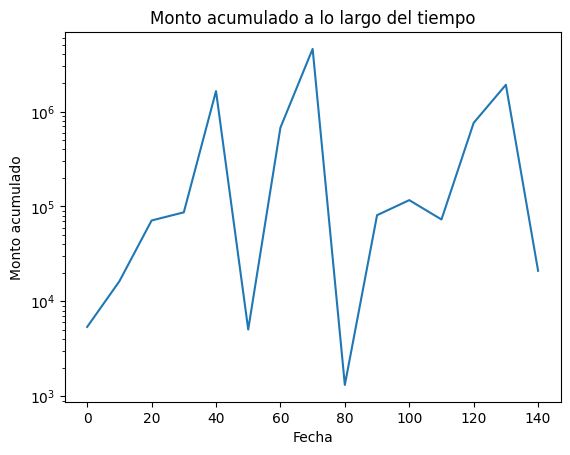

In [27]:
# Visualizar el cada 100 valores
plt.plot(np.arange(length+1)[::10], dates[::10])
plt.xlabel('Fecha')
plt.ylabel('Monto acumulado')
plt.title('Monto acumulado a lo largo del tiempo')
# Poner los ejes en notacion cientifica para y o escala logaritmica
plt.yscale('log')
plt.show()

In [35]:
# Ahora uno donde el valor 1.75 sea multiplicado por un valor aleatorio entre 0 y 1 y luego por un valor entero entre 0 y 1
dates2 = np.zeros(length+1)
index = 0
for i in tqdm(range(len(df))):
    date = df['fechaCobroBanco'].iloc[i]
    if date == default:
        idx = index
    else:
        idx = int((date - min_date) // 60 // 60 // 24)
    # if the value of montoCobrado is 0, is not considered
    if df['montoCobrado'].iloc[i] != 0:
        
        dates2[idx] += (df['montoCobrado'].iloc[i] - 1.75 * np.random.rand() * np.random.randint(0, 2))

100%|██████████| 2114172/2114172 [00:59<00:00, 35294.04it/s]


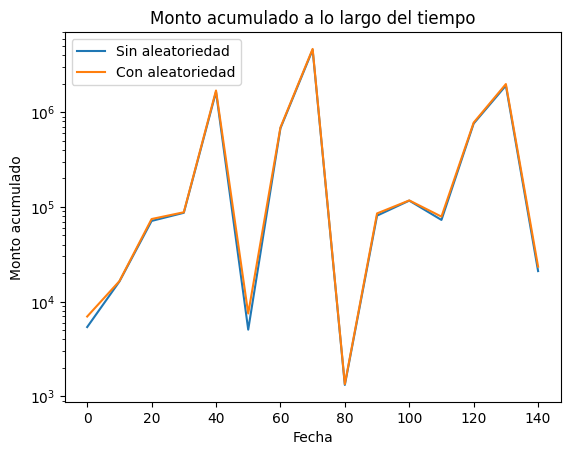

In [36]:
# Visualizar y comparar los resultados de las dos series
plt.plot(np.arange(length+1)[::10], dates[::10], label='Sin aleatoriedad')
plt.plot(np.arange(length+1)[::10], dates2[::10], label='Con aleatoriedad')
plt.xlabel('Fecha')
plt.ylabel('Monto acumulado')
plt.title('Monto acumulado a lo largo del tiempo')
plt.yscale('log')
plt.legend()
plt.show()

In [64]:
# Agrupemos por idCredito
df['orden'] = df.groupby('idCredito').cumcount()
# Observamos el agrupamiento por idCredito
print(df.groupby('idCredito').size())

idCredito
733236    653
733240     17
733247      9
733253     19
733254     26
         ... 
755683      1
755695      1
755726      1
755859     16
756595      5
Length: 5319, dtype: int64


In [61]:
# Ahora veamos cuanto porcentaje de la variable orden es mayor a 1
# Agrupamos por idCredito y orden
grouped = df.groupby(['idCredito']).agg({'orden': 'max', 'montoCobrado': 'sum'})
# Ponderamos el montoCobrado por el orden
grouped['montoCobrado'] = grouped['montoCobrado'] / grouped['orden']
print (grouped)

           orden  montoCobrado
idCredito                     
733236       652      1.799172
733240        16    294.494375
733247         8    839.756250
733253        18     23.438333
733254        25     21.140400
...          ...           ...
755683         0           inf
755695         0           inf
755726         0           inf
755859        15      0.000000
756595         4    101.307500

[5319 rows x 2 columns]
